In [2]:
import pandas as pd
df=pd.read_csv('Fake_Real_Data.csv')

In [3]:
print(df.shape)
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
df.label.value_counts()

Fake    5000
Real    4900
Name: label, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['New_label']=l.fit_transform(df.label)

# fake=0, Real=1

In [6]:
df

,Text,label,New_label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1
...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0
9896,Trump consults Republican senators on Fed chie...,Real,1
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0


In [8]:
import spacy
nlp=spacy.load('en_core_web_lg')

In [9]:
df['vector']=df['Text'].apply(lambda text: nlp(text).vector)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df.vector.values,df.New_label,test_size=.2,random_state=2022,stratify=df.New_label)

In [13]:
print(x_train.shape)
print(x_test.shape)

(7920,)
(1980,)


In [14]:
x_train

array([array([-1.2675549e+00,  6.8192732e-01, -1.9475011e+00,  1.4081852e-01,
               3.5569003e+00,  2.3938255e-01,  4.0692618e-01,  4.0469904e+00,
              -3.9672902e-01, -2.8504139e-01,  5.1708250e+00,  1.3961323e+00,
              -1.9686722e+00,  4.2911580e-01,  1.0954049e+00,  1.1685810e+00,
               6.7739767e-01, -1.0524343e+00, -1.4529647e+00, -1.5920606e+00,
               6.0325104e-01,  2.3137387e-02, -5.5202174e-01,  8.1643902e-02,
              -4.4658305e-03, -1.4402308e+00, -2.9736087e+00, -3.1800634e-01,
              -4.0550089e-01,  1.0422446e+00,  1.3341486e+00, -4.7567844e-01,
              -9.5391572e-02, -8.9102221e-01, -2.0837405e+00, -1.5342470e+00,
              -3.1662717e-01,  1.1175864e+00,  6.7466658e-01,  3.9466199e-01,
              -3.1778240e-01,  3.6233380e-01,  2.7074909e-01,  2.5290132e-01,
              -6.4679819e-01,  1.0612921e+00, -5.0613713e-01, -2.3036592e+00,
              -9.9866569e-01,  2.3919592e+00, -1.3695230e+00,  1

In [15]:
import numpy as np

In [16]:
x_train.ndim

1

In [19]:
X_train_2d=np.stack(x_train)
X_test_2d=np.stack(x_test)

In [21]:
X_train_2d

array([[-1.2675549 ,  0.6819273 , -1.9475011 , ...,  0.20059983,
        -3.2516472 ,  1.2077194 ],
       [-1.4524416 ,  1.0771673 , -2.1226993 , ..., -0.6376118 ,
        -3.424188  ,  1.1901333 ],
       [-0.71132106,  1.5419773 , -2.1290784 , ..., -0.12933595,
        -3.11855   ,  1.3995087 ],
       ...,
       [-2.178339  ,  0.6903691 , -1.6112626 , ..., -1.865894  ,
        -1.6003052 ,  0.85504836],
       [-1.7354125 ,  0.8655342 , -2.3402264 , ..., -1.1761777 ,
        -1.8302305 ,  1.2502793 ],
       [-1.7424282 ,  0.32420015, -1.5036304 , ..., -0.1224215 ,
        -0.0785628 ,  0.01765033]], dtype=float32)

In [23]:
# Negative value wil create the problem in model fiting so scalled that using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scaled_train=scale.fit_transform(X_train_2d)
scaled_test=scale.fit_transform(X_test_2d)

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(scaled_train,y_train)
y_pred=clf.predict(scaled_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1000
           1       0.97      0.92      0.94       980

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=10)
clf.fit(scaled_train,y_train)
y_pred=clf.predict(scaled_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [26]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(scaled_train,y_train)
y_pred=clf.predict(scaled_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1000
           1       0.99      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
clf.fit(scaled_train,y_train)
y_pred=clf.predict(scaled_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

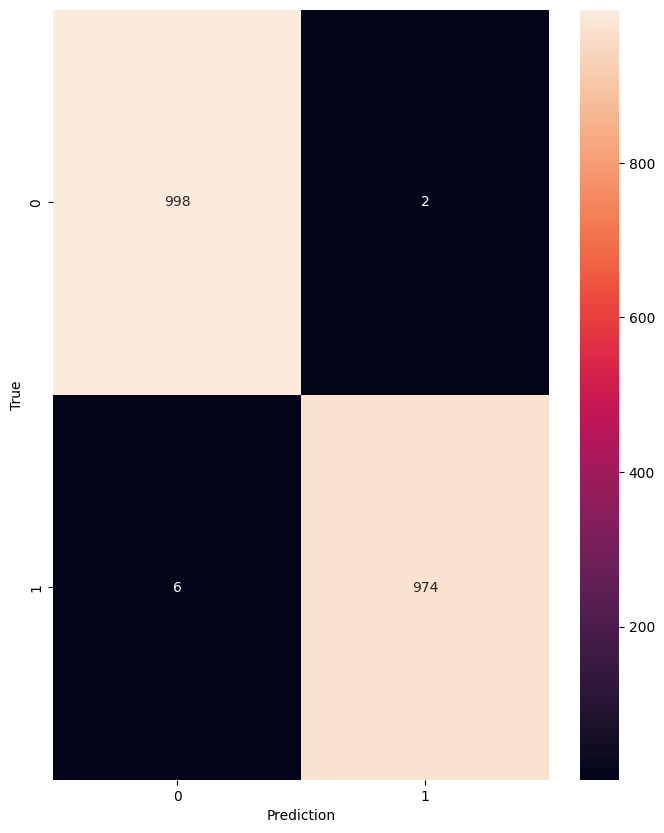

In [30]:
plt.figure(figsize=(8,10))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

In [31]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: gensim in c:\users\amit\appdata\local\programs\python\python310\lib\site-packages (4.3.1)

